# Parità

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from matplotlib import pyplot as plt

In [23]:
numero_test = 10000
X = np.random.randint(0, 1000, size=numero_test)
y = X % 2  # 0 per pari, 1 per dispari

In [11]:
# Prepara i dati
# Convertiamo i numeri in rappresentazione binaria a 10 bit (per numeri fino a 1023)
X_binary = np.array([list(map(int, np.binary_repr(x, width=10))) for x in X])

In [12]:
# Dividi in training e test set
X_train, X_test, y_train, y_test = train_test_split(X_binary, y, test_size=0.2, random_state=42)

# Normalizza i dati
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

In [20]:
# Crea il modello
model = Sequential()
# model.add(Dense(16, input_dim=10, activation='relu'))  # 10 input bits
# model.add(Dense(1, input_dim=10, activation='relu'))
model.add(Dense(1, input_dim=10, activation='tanh'))  # Output: 0-1 (pari-dispari)

# Compila il modello
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
# Addestra il modello
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=20,
                    batch_size=32,
                    verbose=1)

Epoch 1/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4895 - loss: 2.7094 - val_accuracy: 0.5195 - val_loss: 1.5395
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5197 - loss: 1.5597 - val_accuracy: 0.5435 - val_loss: 1.0621
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5496 - loss: 1.0959 - val_accuracy: 0.5590 - val_loss: 0.9756
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5724 - loss: 1.0367 - val_accuracy: 0.5770 - val_loss: 0.9185
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5920 - loss: 0.9560 - val_accuracy: 0.6105 - val_loss: 0.7838
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6121 - loss: 0.8304 - val_accuracy: 0.6475 - val_loss: 0.6542
Epoch 7/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6575 - loss: 0.6755 - val_accuracy: 0.7155 - val_loss: 0.5407
Epoch 8/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7286 - loss: 0.5241 - val_accuracy: 0.

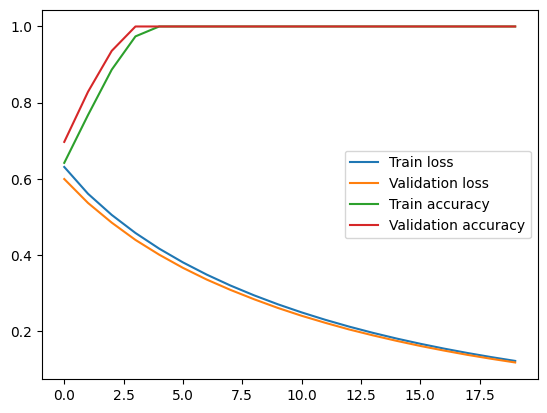

In [16]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.legend()
plt.show()

In [24]:
# Valuta il modello
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\nAccuracy sul test set: {accuracy:.4f}")


Accuracy sul test set: 1.0000


In [18]:
# Esempio di predizione
def predict_parity(number):
    binary = np.array([list(map(int, np.binary_repr(number, width=10)))])
    binary = scaler.transform(binary)
    prediction = model.predict(binary)
    return "pari" if prediction < 0.5 else "dispari"

In [19]:
# Testa con alcuni numeri
test_numbers = [23, 42, 7, 100, 999, 12, 1023, 0, 8, 55, 88, 123]
for num in test_numbers:
    print(f"{num} è {predict_parity(num)}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
23 è dispari
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
42 è pari
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
7 è dispari
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
100 è pari
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
999 è dispari
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
12 è pari
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1023 è dispari
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
0 è pari
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
8 è pari
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
55 è dispari
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
88 è pari
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
123 è dispari
